# House Predication
### XGBoost Regression Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [ ]:
data = pd.read_csv('BostonHousing.csv')

In [8]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
data.rename(columns={'medv': 'Price'}, inplace=True)

In [10]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
corr = data.corr()

<Axes: >

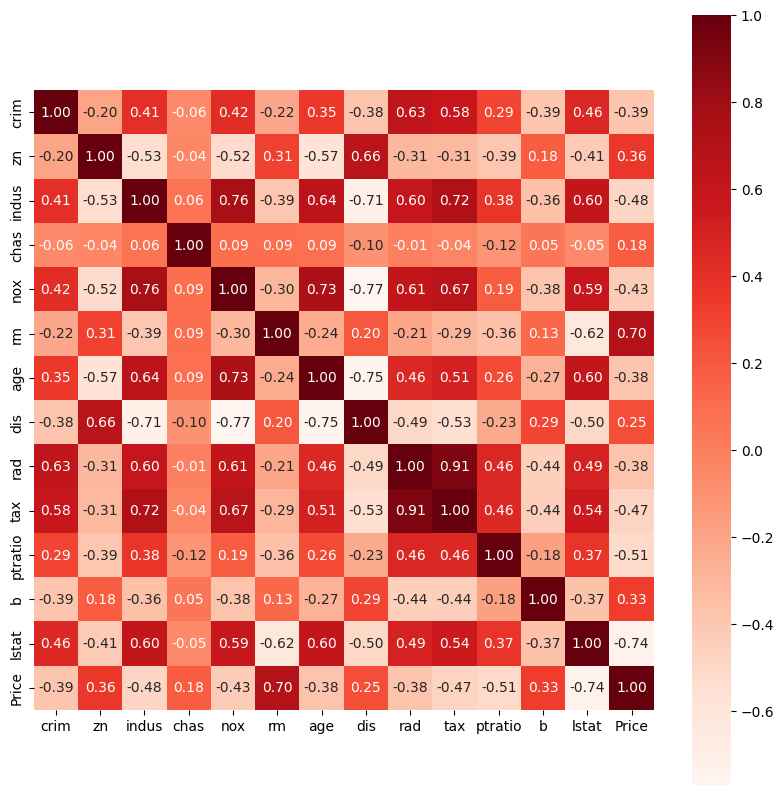

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},cmap='Reds')

In [15]:
X = data.drop(['Price'], axis=1)
Y = data['Price']

In [16]:
print(X)
print(Y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
print(X.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [20]:
model = XGBRegressor()


In [21]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [22]:
prediction = model.predict(x_test)

In [23]:
print(prediction)

[23.051582  22.26548   30.534235  30.298868   8.283541  13.436366
 24.575932  27.766064  19.182896  17.776907  26.796337  23.131065
 20.013227  21.383413  13.640971  22.113802  21.40974   11.393402
  8.339752  16.61833   22.370926  20.283094  36.801643  19.567535
 13.8622055 18.482763  47.20366   30.693798  34.992237  18.970066
 16.478281  20.275381  30.901081  24.435282  12.624655  19.072628
 10.865764  20.886345  22.904762  21.985025  26.506695  13.329459
 27.695917   7.940863  20.765049  13.987141  34.935993  14.539947
 31.870438  16.105537  29.867462  26.532923   6.668651  33.866
 24.236544  18.535002  19.203188  19.781084  16.424307  23.35871
 20.073387  21.032986  18.888412  28.552784  32.391296  25.537346
 49.109154  26.794142   9.679564  23.440357  15.96349    8.445381
 15.487857  16.580793  26.893454  24.326546  20.8615    22.012526
 18.717272  24.266758  34.40664   18.5962    20.085379  31.239168
 47.928627  36.38205   16.971954  24.86152   30.626663  18.267553
 20.64684   19

In [24]:
s1 = metrics.r2_score(y_test,prediction)
s2 = metrics.mean_absolute_error(y_test,prediction)

print('R2 score:',s1)
print('Mean absolute error:',s2)

R2 score: 0.9156404620793328
Mean absolute error: 1.9900942007700595


In [1]:

predi = model.predict(X)

NameError: name 'model' is not defined